# AI Lab: Blokus


## Tile Detection


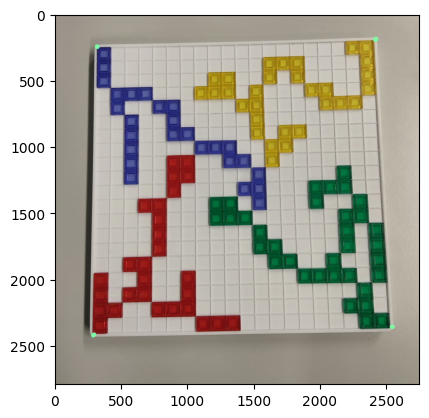

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.detection import board_seg, normalization, grid


image_path = "readme_files/input.png"

image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Board Segmentation



0: 640x640 1 board, 451.7ms
Speed: 16.5ms preprocess, 451.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


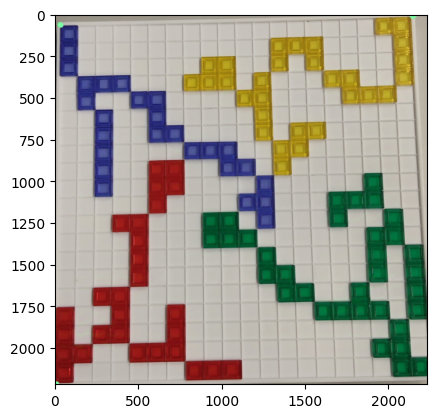

In [9]:
img = image.copy()
img = cv2.bilateralFilter(img, 9, 75, 75)
img_segmented = board_seg.board_seg_by_model(img)
plt.imshow(cv2.cvtColor(img_segmented, cv2.COLOR_BGR2RGB))

### Image Normalization


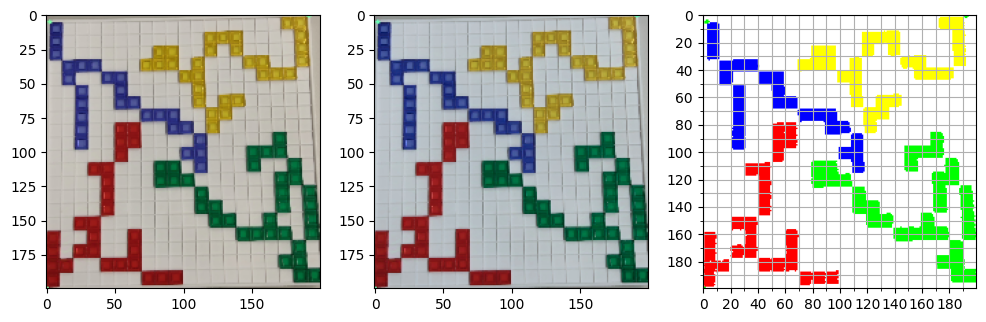

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 12))

img = cv2.resize(img_segmented, (200, 200))
ax = axes[0]
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = normalization.__color_correction(img)
ax = axes[1]
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

rgyb_thres = (167, 107, 167, 97)
img_normalized = normalization.__color_mapping(img, rgyb_thres)
ax = axes[2]
major_ticks = np.arange(0, 201, 20)
minor_ticks = np.arange(0, 201, 10)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which="both")
ax.imshow(cv2.cvtColor(img_normalized, cv2.COLOR_BGR2RGB))

### Split Image into Grid

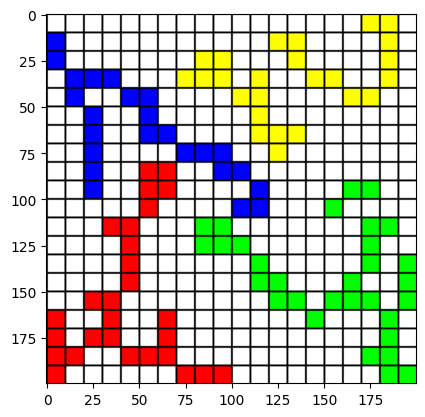

In [15]:
img_mini, img_full = grid.generate_grid(img_normalized)
plt.imshow(cv2.cvtColor(img_full, cv2.COLOR_BGR2RGB))

In [17]:
!jupyter nbconvert --to markdown readme.ipynb

[NbConvertApp] Converting notebook readme.ipynb to markdown
[NbConvertApp] Support files will be in readme_files\
[NbConvertApp] Writing 2166 bytes to readme.md
